In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"data.csv")
print(data)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [3]:
data = data.drop(columns=['rainfall'])
print(data)

        N   P   K  temperature   humidity        ph   label
0      90  42  43    20.879744  82.002744  6.502985    rice
1      85  58  41    21.770462  80.319644  7.038096    rice
2      60  55  44    23.004459  82.320763  7.840207    rice
3      74  35  40    26.491096  80.158363  6.980401    rice
4      78  42  42    20.130175  81.604873  7.628473    rice
...   ...  ..  ..          ...        ...       ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  coffee
2196   99  15  27    27.417112  56.636362  6.086922  coffee
2197  118  33  30    24.131797  67.225123  6.362608  coffee
2198  117  32  34    26.272418  52.127394  6.758793  coffee
2199  104  18  30    23.603016  60.396475  6.779833  coffee

[2200 rows x 7 columns]


<Axes: >

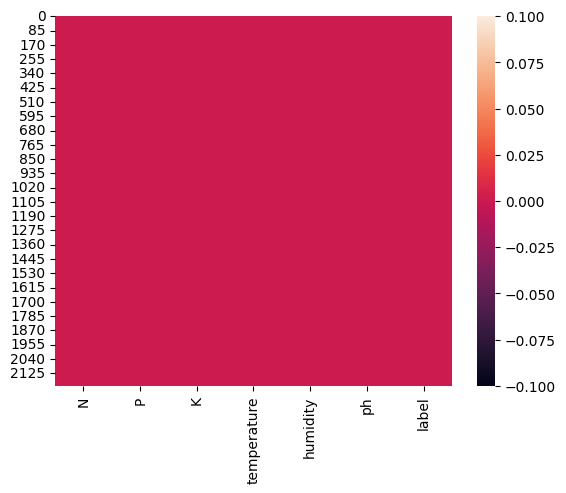

In [4]:
sns.heatmap(data.isnull())

In [5]:
x= data.iloc[:,:-1].values
y= data.iloc[:,-1].values
print(x)
print(y)

[[ 90.          42.          43.          20.87974371  82.00274423
    6.50298529]
 [ 85.          58.          41.          21.77046169  80.31964408
    7.03809636]
 [ 60.          55.          44.          23.00445915  82.3207629
    7.84020714]
 ...
 [118.          33.          30.          24.13179691  67.22512329
    6.36260785]
 [117.          32.          34.          26.2724184   52.12739421
    6.75879255]
 [104.          18.          30.          23.60301571  60.39647474
    6.77983261]]
['rice' 'rice' 'rice' ... 'coffee' 'coffee' 'coffee']


In [6]:

from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test,y_train, y_test = train_test_split(x,y , test_size=0.20)

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [9]:
from sklearn.metrics import classification_report

In [10]:
knncr = classification_report(y_test, gnb.predict(x_test))
print(knncr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        20
   blackgram       0.85      0.96      0.90        24
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        13
        jute       0.71      0.74      0.72        23
 kidneybeans       1.00      1.00      1.00        15
      lentil       0.94      0.76      0.84        21
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        20
   mothbeans       0.92      0.92      0.92        25
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00        20
      papaya       1.00    

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [12]:
knncr = classification_report(y_test, lr.predict(x_test))
print(knncr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        20
   blackgram       0.82      0.96      0.88        24
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        13
        jute       0.61      0.74      0.67        23
 kidneybeans       0.94      1.00      0.97        15
      lentil       0.87      0.62      0.72        21
       maize       0.94      1.00      0.97        16
       mango       1.00      1.00      1.00        20
   mothbeans       0.92      0.88      0.90        25
    mungbean       0.96      1.00      0.98        22
   muskmelon       0.95      1.00      0.98        21
      orange       1.00      1.00      1.00        20
      papaya       1.00    

In [16]:
input_2 = [[90,42,43,20,80,6.5]]
ypp = gnb.predict(input_2)

print(ypp)

['rice']


In [14]:
import joblib

In [20]:
joblib.dump(gnb,'crop_model.joblib')

['crop_predict.joblib']